#### spam_classification

Building a spam classifier involves training a model to distinguish between spam and non-spam (ham) emails based on some features.


IMPORTING LIBRARIES:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import nltk

# Data Collection:

In [2]:
DATA=pd.read_csv("dataset/spam.csv",encoding='latin-1')
DATA.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing

In [3]:
DATA.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)


In [4]:
DATA=DATA.rename(columns={"v1":"TYPE","v2":"EMAIL"})
DATA.head()

,TYPE,EMAIL
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
DATA.describe()

,TYPE,EMAIL
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
DATA.isnull().sum(axis=0)

TYPE     0
EMAIL    0
dtype: int64

In [7]:
number_of_occurence=DATA['TYPE'].value_counts()
number_of_occurence

TYPE
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
types=number_of_occurence.index
times=number_of_occurence.values


Text(0.5, 1.0, 'number on each type of emails')

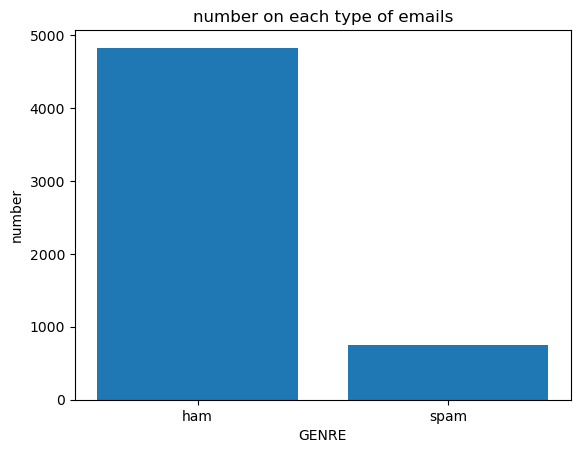

In [9]:
plt.bar(types, times)
plt.xlabel("GENRE")
plt.ylabel("number")
plt.title('number on each type of emails')


# Feature Extraction

In [10]:
nltk.download('stopwords')
DATA['EMAIL']=DATA['EMAIL'].str.lower().str.replace('[{}]'.format(string.punctuation), '')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words=set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    tokens=word_tokenize(text)
    filtred_tokens=[word for word in tokens if word.isalnum and word not in stop_words]
    stemmed_token=[stemmer.stem(word)for word in filtred_tokens]
    preprocessed_text=' '.join(stemmed_token)
    return preprocessed_text

DATA['TYPE']=DATA['TYPE'].apply(clean_text)
DATA.head()


,TYPE,EMAIL
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [12]:
Classes={'spam':1, 'ham':0}

DATA['TYPE'] = DATA['TYPE'].replace(Classes)
DATA.head()

,TYPE,EMAIL
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [13]:
DATA.drop_duplicates()

,TYPE,EMAIL
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
features = count_vectorizer.fit_transform(DATA['EMAIL'])
features = features.toarray()


# Split the Data

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(features,DATA["TYPE"],test_size=0.2,random_state=42)

# Model Selection
# Model Training
# Model Training

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

classifer = MultinomialNB()
classifer.fit(X_train, Y_train)
predections=classifer.predict(X_test)
predections


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [17]:
Y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
4264    0
2439    0
5556    0
4205    0
4293    1
Name: TYPE, Length: 1115, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score, classification_report

accuracy1=accuracy_score(predections,Y_test)
accuracy1


0.9811659192825112

In [19]:
report = classification_report(Y_test,predections)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.94      0.92      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Model Selection:we can use logistic regression
 Model Training
 Model Training

In [22]:
from sklearn.linear_model import LogisticRegression

classifer2=LogisticRegression()
classifer2.fit(X_train,Y_train)
predictions2=classifer2.predict(X_test)

In [23]:
accuracy2=accuracy_score(predictions2,Y_test)
accuracy2

0.9766816143497757

In [25]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions2)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

